In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import random

from scipy.integrate import solve_ivp
import torch 

In [2]:
# Чтобы при вызове print или display после точки выводилось фиксированное число знаков

# np.set_printoptions(precision=5, suppress=True)

# Генерация наших данных

Начальные концентрации:        [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
Сумма концентрций веществ:  0.9999999999999999
[5.19498155e-06 1.54594957e-03 1.80646380e-03 6.22171901e-07
 3.98887190e-06]


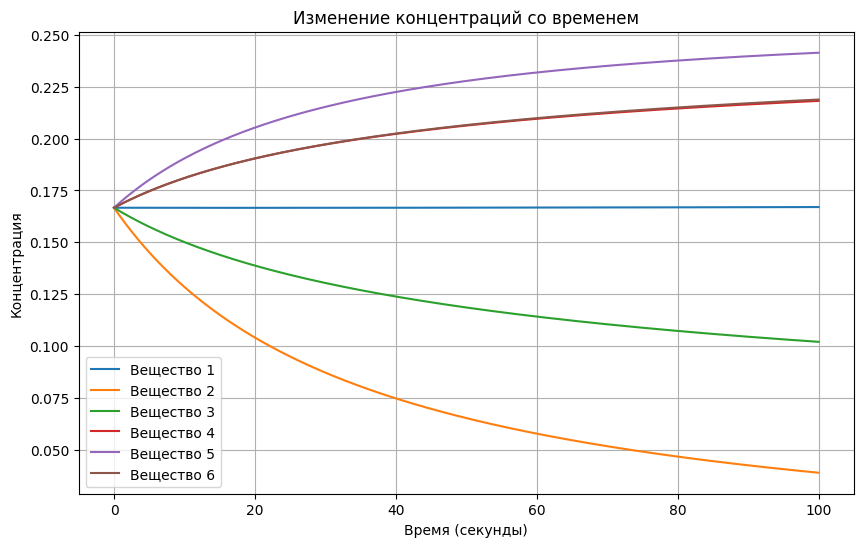

Концентрации после 100 секунд: [0.16699309 0.03907172 0.1021     0.21811198 0.24130944 0.21876702]
Сумма концентрций веществ:  0.9863532425341756


In [3]:
# random.seed(1)

# Константы
N_REACTION = 5                                                                # реакций
N_SUBSTANCE = 6                                                               # веществ
A = np.array([100000000, 90000000, 85000000, 110000000, 95000000])
Ea= np.array([70000, 60000, 55000, 80000, 75000])
R = 8.314
temp = 300
vr_time = 100
H = 0.01
MATR = np.array([
    [-2, -1, 1, 1, 0, 0],
    [0, -2, 1, 0, 2, 0],
    [0, -1, -2, 1, 0, 1],
    [1, 0, 0, -2, 1, 0],
    [1, 0, 0, 0, -2, 1]
])

# Матрица порядков реакций
MATR_PLUS = np.where(MATR < 0, -MATR, 0)
k = A * np.exp(-Ea / (R * temp)) * (temp**0.5)

# Переменные, будут заводиться отдельно
C = np.full(N_SUBSTANCE, 1 / N_SUBSTANCE)
print("Начальные концентрации:       ", C)
print("Сумма концентрций веществ: ", sum(C))

# Список для хранения концентраций на каждом шаге времени
concentration_history = [C.copy()]

print(np.array([k[j] * np.prod(C**MATR_PLUS.T[:, j]) for j in range(N_REACTION)]))

def dC_dt(C):
    W = np.array([k[j] * np.prod(C**MATR_PLUS.T[:, j]) for j in range(N_REACTION)])  # Скорость для каждой реакции
    dC = MATR.T @ W  # Изменение концентраций
    return dC

time_steps = int(vr_time / H)
for _ in range(time_steps):
    dC = dC_dt(C)
    C += dC * H
    concentration_history.append(C.copy())

concentration_history = np.array(concentration_history)

# Построение графика
time = np.linspace(0, vr_time, time_steps + 1)
plt.figure(figsize=(10, 6))
for i in range(N_SUBSTANCE):
    plt.plot(time, concentration_history[:, i], label=f"Вещество {i+1}")

plt.title("Изменение концентраций со временем")
plt.xlabel("Время (секунды)")
plt.ylabel("Концентрация")
plt.legend()
plt.grid()
plt.show()

print(f"Концентрации после {vr_time} секунд: {C}")
print("Сумма концентрций веществ: ", sum(C))


# Генерация данных нашим подходом, но для CRNN-модели

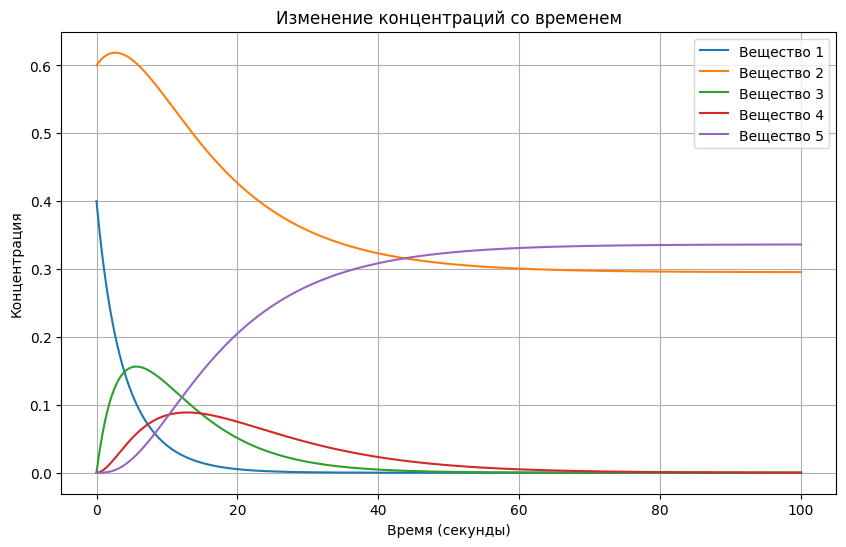

Начальные концентрации:        [0.4 0.6 0.  0.  0. ]
Сумма концентрций веществ:  1.0
Концентрации после 100 секунд: [5.76835235e-10 2.95556209e-01 1.99073588e-06 1.67152430e-04
 3.36239480e-01]
Сумма концентрций веществ:  0.6319648320602071


In [4]:
# random.seed(1)

# Константы
N_REACTION = 4                                                               # реакций
N_SUBSTANCE = 5                                                              # веществ
vr_time = 100
H = 0.01
MATR = np.array([
    [-2, 1, 0, 0, 0],
    [-1, 0, 1, 0, 0],
    [0, 0, -1, 1, 0],
    [0, -1, 0, -1, 1]
])

# Матрица порядков реакций
MATR_PLUS = np.where(MATR < 0, -MATR, 0)
k = torch.tensor([0.1, 0.2, 0.13, 0.3], dtype=torch.float32)

# Переменные, будут заводиться отдельно
C0 = np.array([0.4, 0.6, 0, 0, 0])
C = np.array([0.4, 0.6, 0, 0, 0])

# Список для хранения концентраций на каждом шаге времени
concentration_history = [C.copy()]

def dC_dt(C):
    W = np.array([k[j] * np.prod(C**MATR_PLUS.T[:, j]) for j in range(N_REACTION)])  # Скорость для каждой реакции
    dC = MATR.T @ W  # Изменение концентраций
    return dC

time_steps = int(vr_time / H)
for _ in range(time_steps):
    dC = dC_dt(C)
    C += dC * H
    concentration_history.append(C.copy())

concentration_history = np.array(concentration_history)

# Построение графика
time = np.linspace(0, vr_time, time_steps + 1)
plt.figure(figsize=(10, 6))
for i in range(N_SUBSTANCE):
    plt.plot(time, concentration_history[:, i], label=f"Вещество {i+1}")

plt.title("Изменение концентраций со временем")
plt.xlabel("Время (секунды)")
plt.ylabel("Концентрация")
plt.legend()
plt.grid()
plt.show()

print("Начальные концентрации:       ", C0)
print("Сумма концентрций веществ: ", sum(C0))

print(f"Концентрации после {vr_time} секунд: {C}")
print("Сумма концентрций веществ: ", sum(C))


# Вариант генерации в CRNN-модели

## Test 1

In [5]:
def true_ode_func(t, y, k):
    """
    Вычисляет производные системы дифференциальных уравнений.
    
    Параметры:
    t : float
        Время (не используется в данном уравнении, но необходим для совместимости с solve_ivp).
    y : array-like
        Вектор переменных (y[0], y[1], ..., y[4]).
    k : array-like
        Коэффициенты (k[0], k[1], ..., k[4]).

    Возвращает:
    dydt : numpy.ndarray
        Вектор производных.
    """
    dydt = np.zeros_like(y)
    dydt[0] = -2 * k[0] * y[0]**2 - k[1] * y[0]
    dydt[1] = k[0] * y[0]**2 - k[3] * y[1] * y[3]
    dydt[2] = k[1] * y[0] - k[2] * y[2]
    dydt[3] = k[2] * y[2] - k[3] * y[1] * y[3]
    dydt[4] = k[3] * y[1] * y[3]
    return dydt

In [6]:
# Константы
N_REACTION = 4                                                               # реакций
N_SUBSTANCE = 5                                                              # веществ
vr_time = 50                                                                # время прохождения реакций

k = torch.tensor([0.1, 0.2, 0.13, 0.3], dtype=torch.float32)
C0 = np.array([0.4, 0.6, 0, 0, 0])                                           # начальные концентрации
C = np.array([0.4, 0.6, 0, 0, 0])

tspan = [0.0, vr_time]                                                       # временной промежуток
tsteps = np.linspace(tspan[0], tspan[1], vr_time)                                 # шаги по временному промежутку

sol = solve_ivp(
        true_ode_func,              # Функция ОДУ
        tspan,                      # Интервал времени
        C,                         # Начальные условия
        args=(k,),                  # Передача параметров в функцию
        method='RK45',              # Метод решения
        t_eval=tsteps               # Точки, в которых сохраняется решение (Шаг)
    )

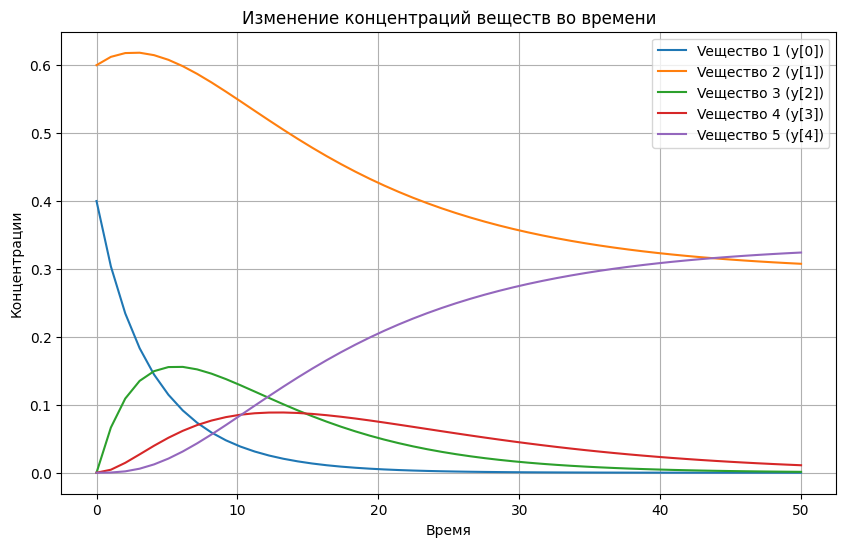

Начальные концентрации:        [0.4 0.6 0.  0.  0. ]
Сумма концентраций веществ:  1.0
Концентрации после 50 секунд: [1.32945080e-05 3.07582947e-01 1.30076872e-03 1.10074697e-02
 3.24170857e-01]
Сумма концентрций веществ:  0.6440753372930405


In [7]:
# Построение графиков
plt.figure(figsize=(10, 6))
for i in range(N_SUBSTANCE):
    plt.plot(sol.t, sol.y[i], label=f'Veщество {i+1} (y[{i}])')

plt.title('Изменение концентраций веществ во времени')
plt.xlabel('Время')
plt.ylabel('Концентрации')
plt.legend()
plt.grid(True)
plt.show()

print("Начальные концентрации:       ", C0)
print("Сумма концентраций веществ: ", sum(C0))

print(f"Концентрации после {vr_time} секунд: {sol.y[:, vr_time - 1]}")
print("Сумма концентрций веществ: ", sum(sol.y[:, vr_time - 1]))


## Test 2

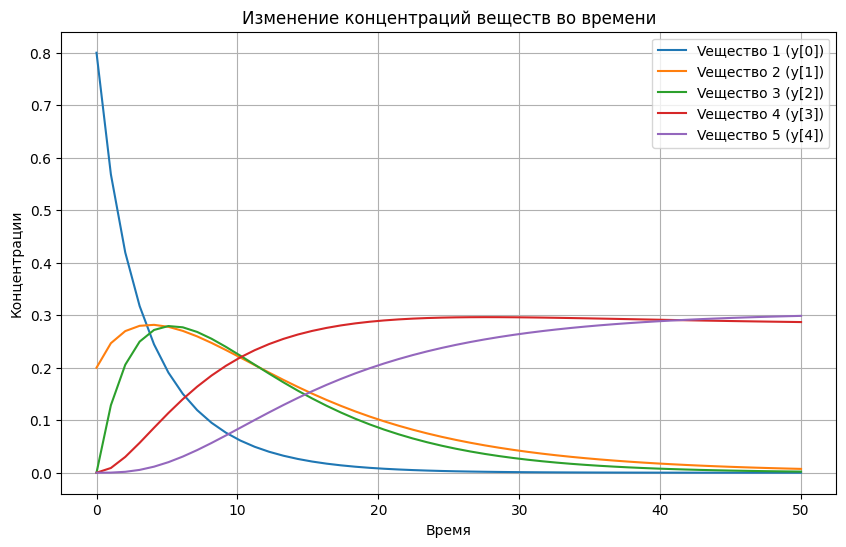

Начальные концентрации:        [0.8 0.2 0.  0.  0. ]
Сумма концентраций веществ:  1.0
Концентрации после 50 секунд: [2.05537153e-05 7.29565376e-03 2.15690712e-03 2.86969897e-01
 2.98753781e-01]
Сумма концентрций веществ:  0.5951967926054427


In [8]:
start_conc_1 = np.array([0.8, 0.2, 0, 0, 0])
sol = solve_ivp(
        true_ode_func,              # Функция ОДУ
        tspan,                      # Интервал времени
        start_conc_1,                         # Начальные условия
        args=(k,),                  # Передача параметров в функцию
        method='RK45',              # Метод решения
        t_eval=tsteps               # Точки, в которых сохраняется решение (Шаг)
    )

# Построение графиков
plt.figure(figsize=(10, 6))
for i in range(N_SUBSTANCE):
    plt.plot(sol.t, sol.y[i], label=f'Veщество {i+1} (y[{i}])')

plt.title('Изменение концентраций веществ во времени')
plt.xlabel('Время')
plt.ylabel('Концентрации')
plt.legend()
plt.grid(True)
plt.show()

print("Начальные концентрации:       ", start_conc_1)
print("Сумма концентраций веществ: ", sum(start_conc_1))

print(f"Концентрации после {vr_time} секунд: {sol.y[:, vr_time - 1]}")
print("Сумма концентрций веществ: ", sum(sol.y[:, vr_time - 1]))


## Test 3

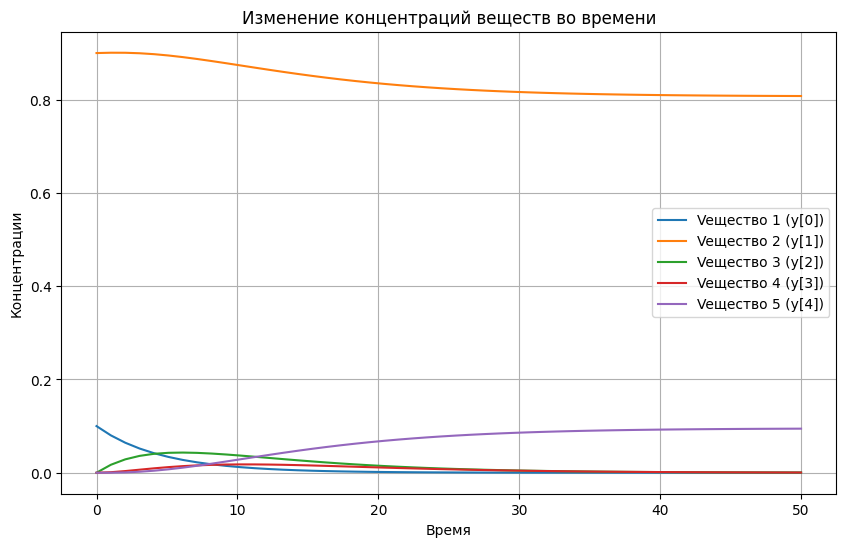

Начальные концентрации:        [0.1 0.9 0.  0.  0. ]
Сумма концентраций веществ:  1.0
Концентрации после 50 секунд: [4.31982125e-06 8.07852573e-01 3.88636663e-04 4.26462919e-04
 9.44918125e-02]
Сумма концентрций веществ:  0.9031638046074923


In [9]:
start_conc_2 = np.array([0.1, 0.9, 0, 0, 0])
sol = solve_ivp(
        true_ode_func,              # Функция ОДУ
        tspan,                      # Интервал времени
        start_conc_2,                         # Начальные условия
        args=(k,),                  # Передача параметров в функцию
        method='RK45',              # Метод решения
        t_eval=tsteps               # Точки, в которых сохраняется решение (Шаг)
    )

# Построение графиков
plt.figure(figsize=(10, 6))
for i in range(N_SUBSTANCE):
    plt.plot(sol.t, sol.y[i], label=f'Veщество {i+1} (y[{i}])')

plt.title('Изменение концентраций веществ во времени')
plt.xlabel('Время')
plt.ylabel('Концентрации')
plt.legend()
plt.grid(True)
plt.show()

print("Начальные концентрации:       ", start_conc_2)
print("Сумма концентраций веществ: ", sum(start_conc_2))

print(f"Концентрации после {vr_time} секунд: {sol.y[:, vr_time - 1]}")
print("Сумма концентрций веществ: ", sum(sol.y[:, vr_time - 1]))
